In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import copy

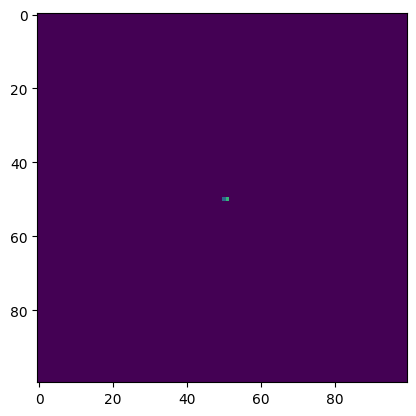

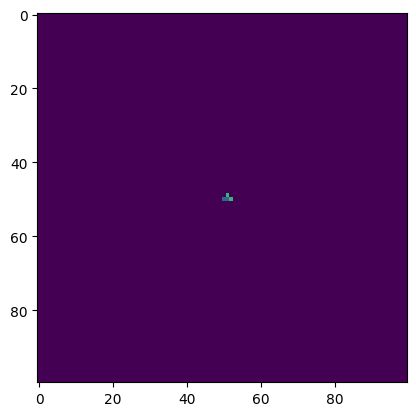

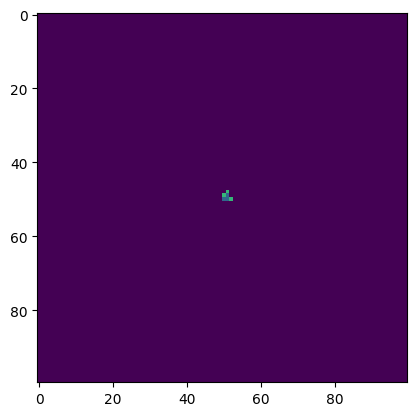

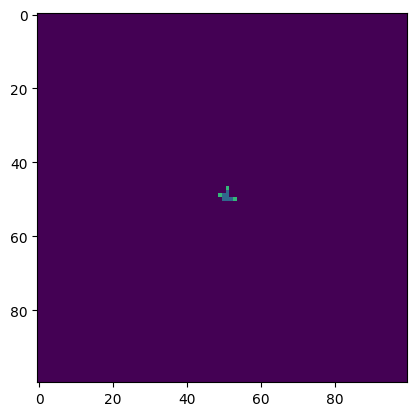

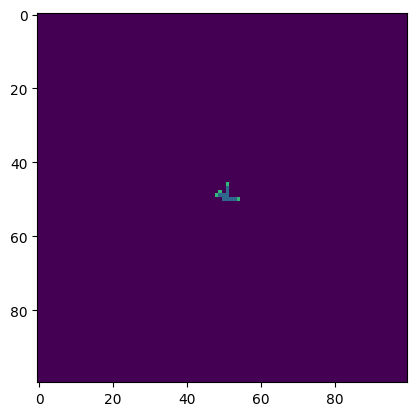

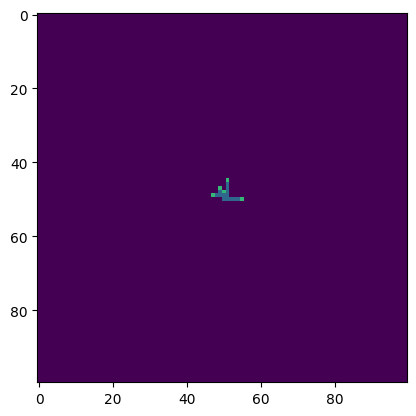

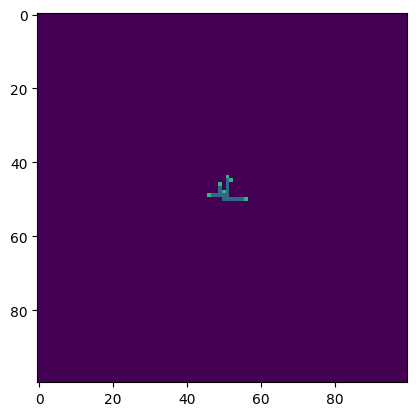

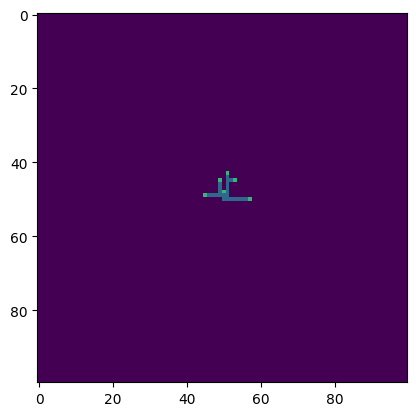

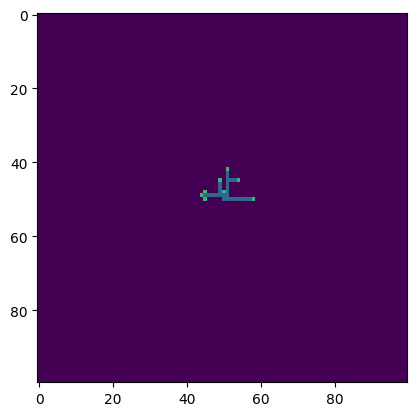

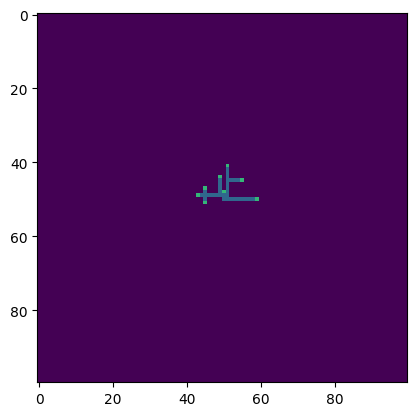

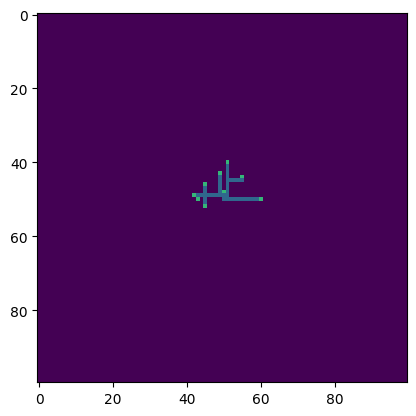

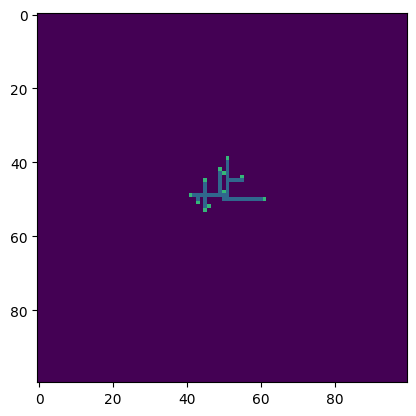

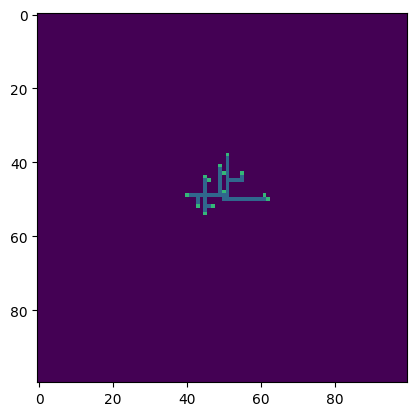

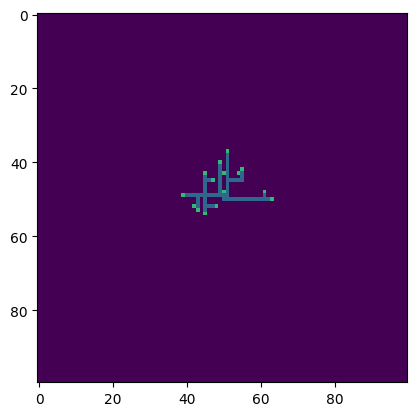

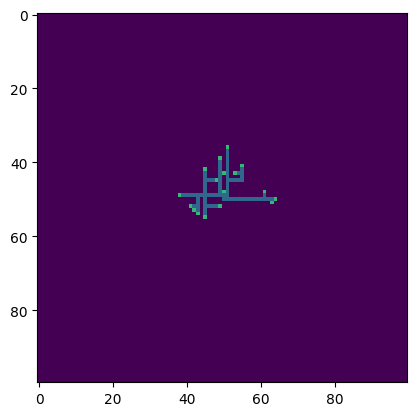

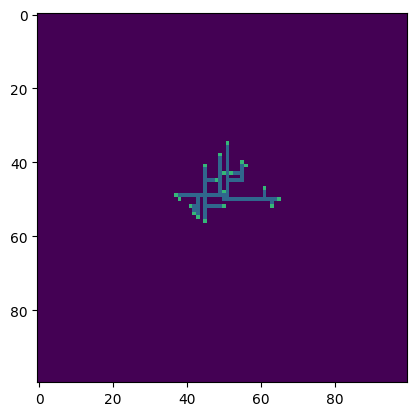

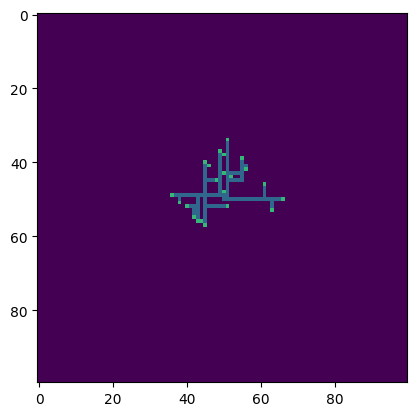

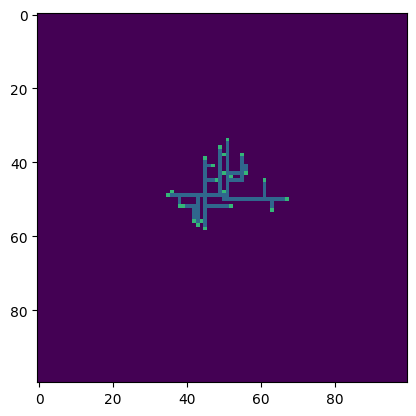

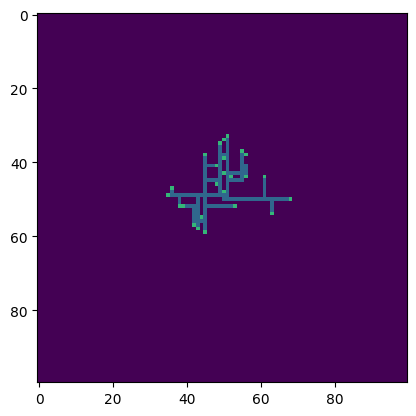

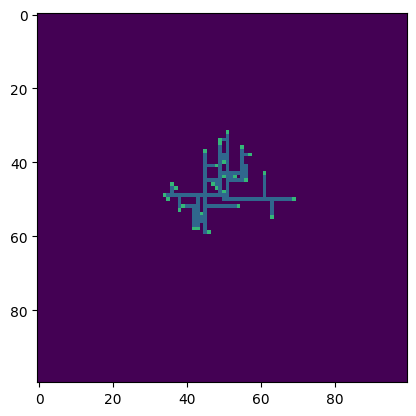

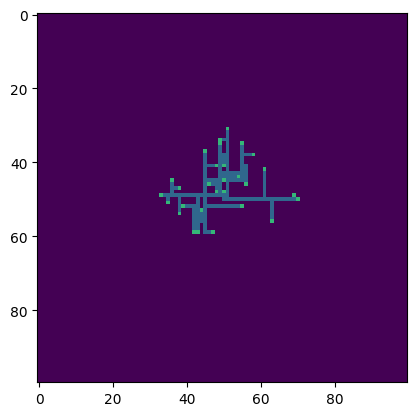

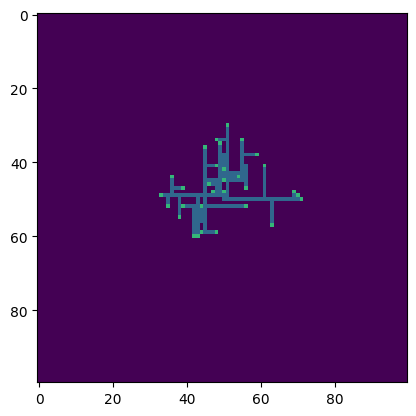

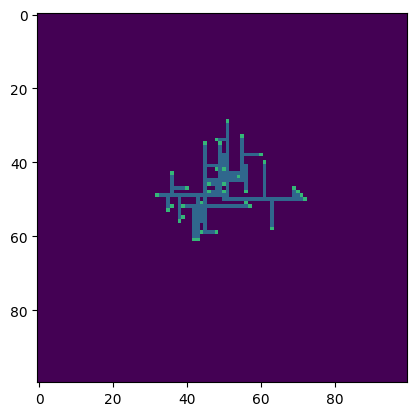

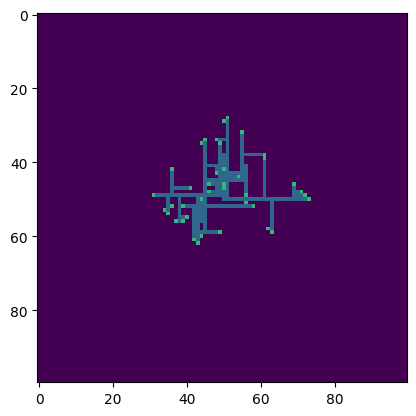

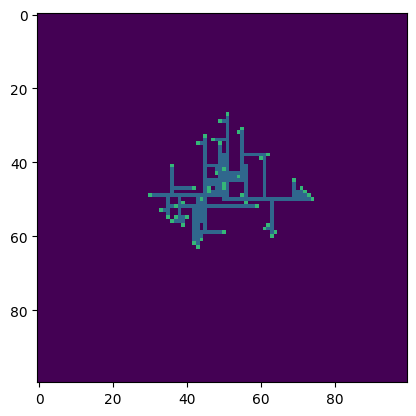

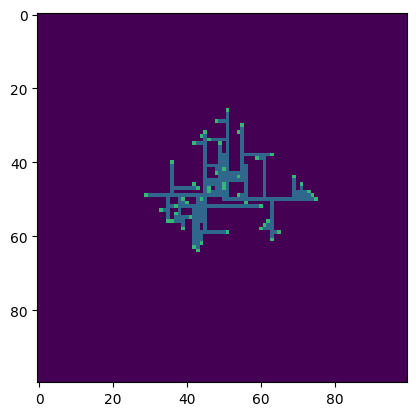

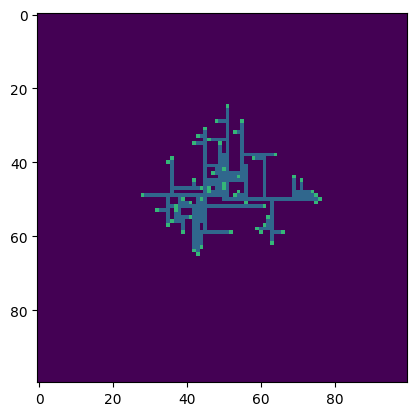

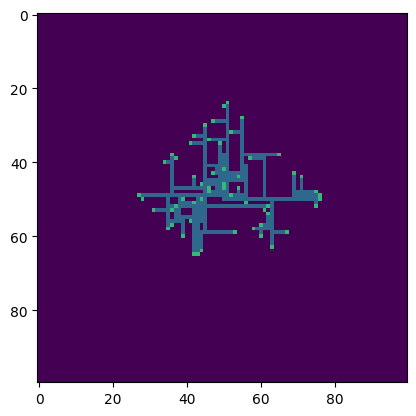

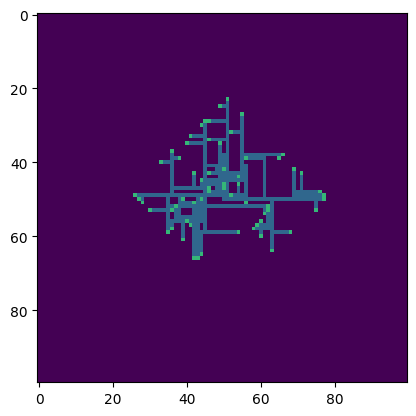

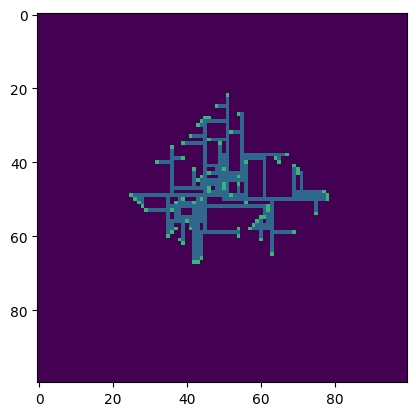

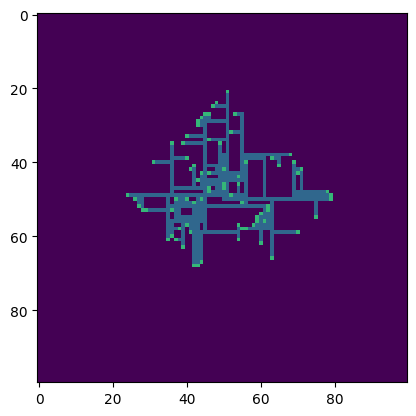

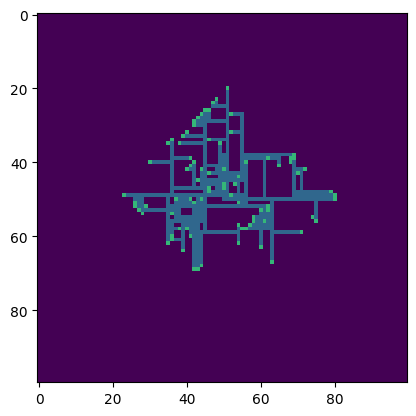

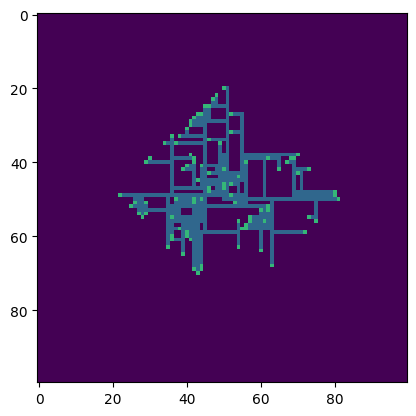

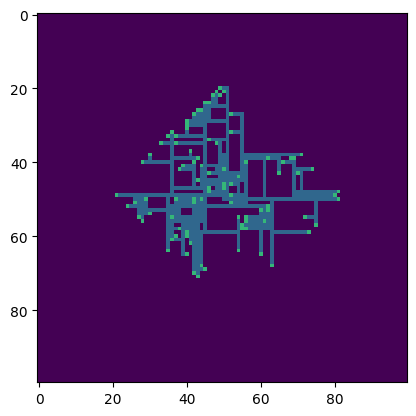

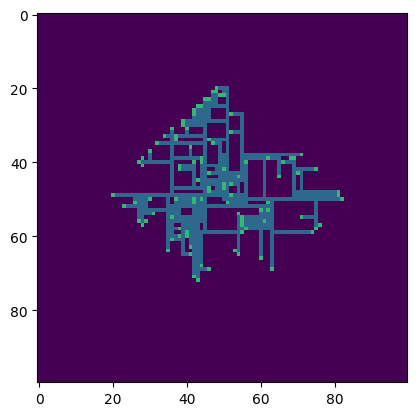

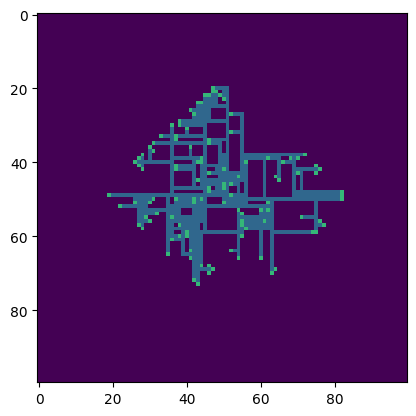

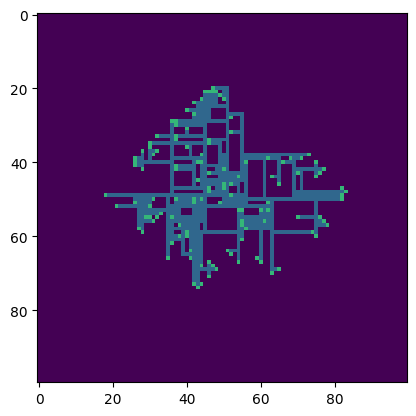

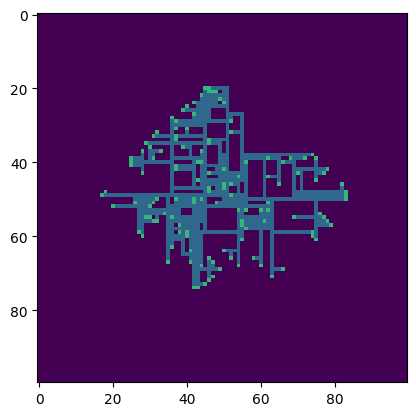

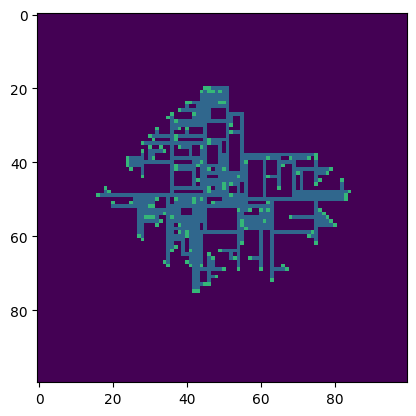

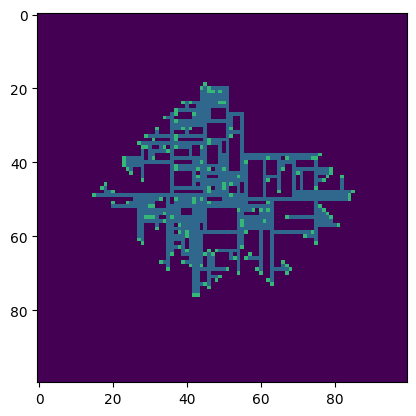

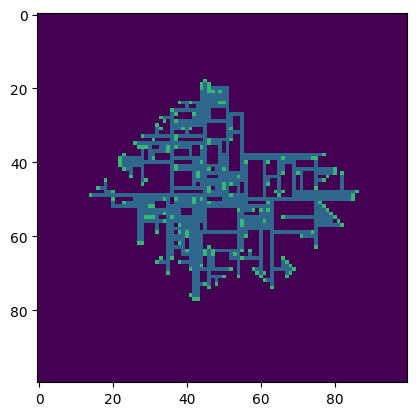

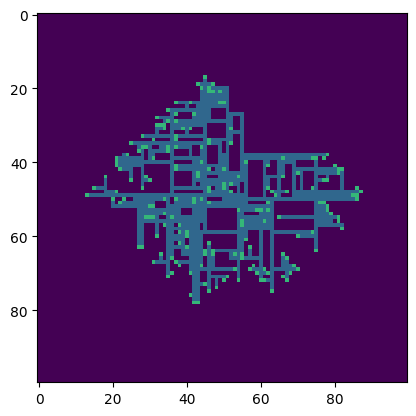

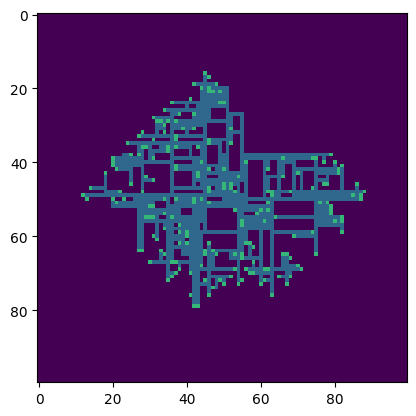

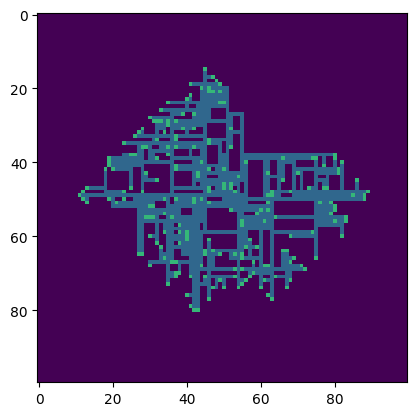

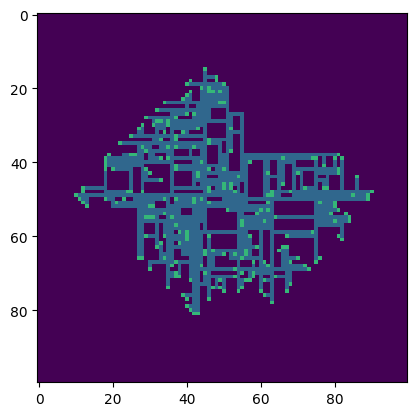

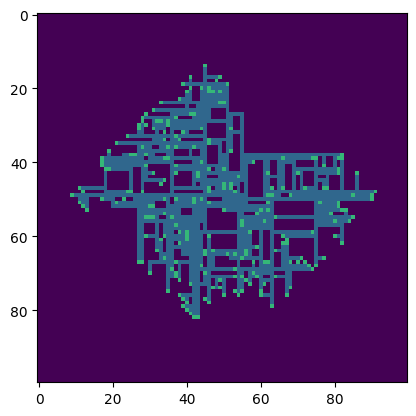

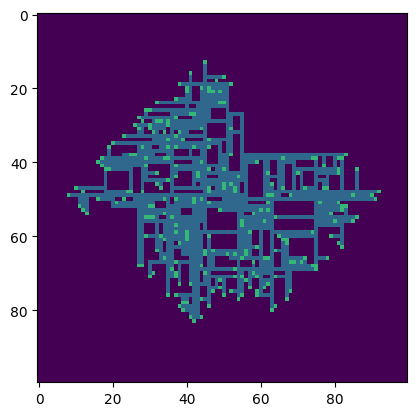

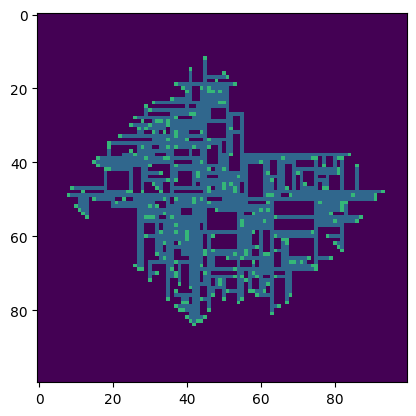

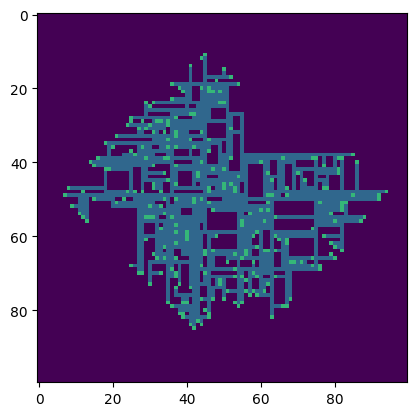

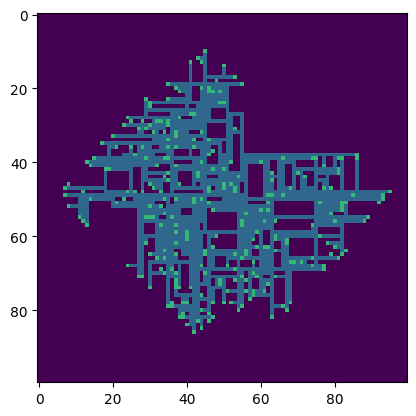

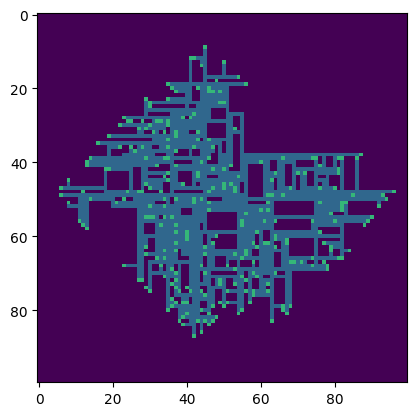

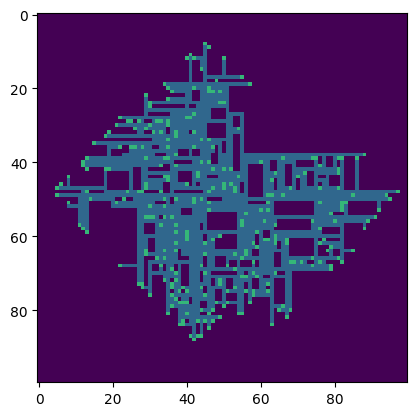

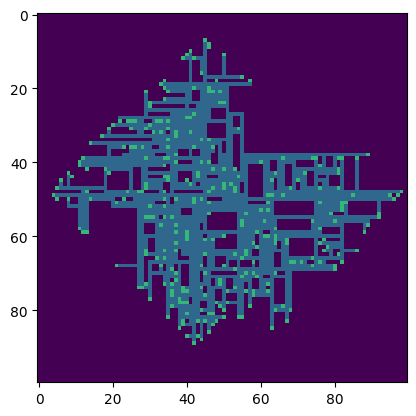

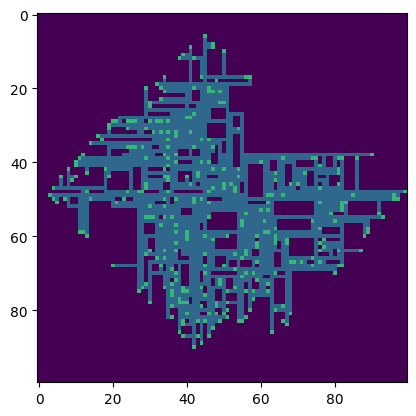

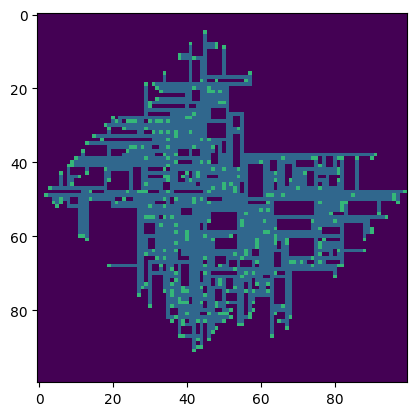

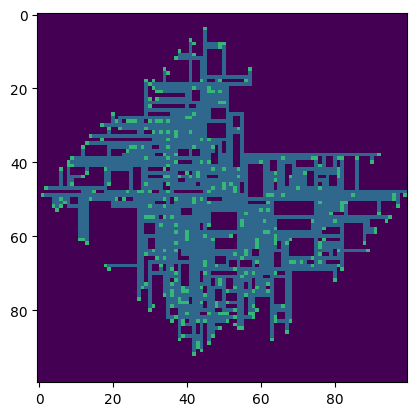

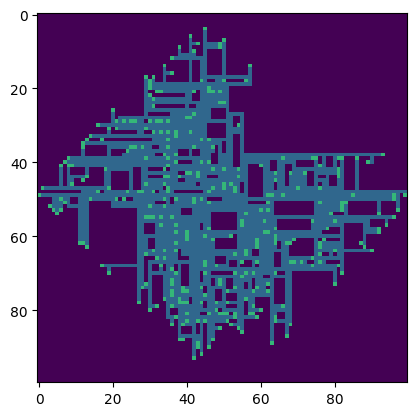

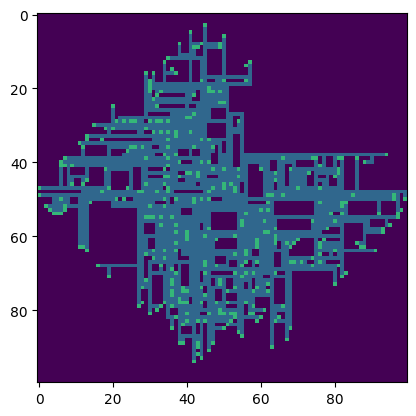

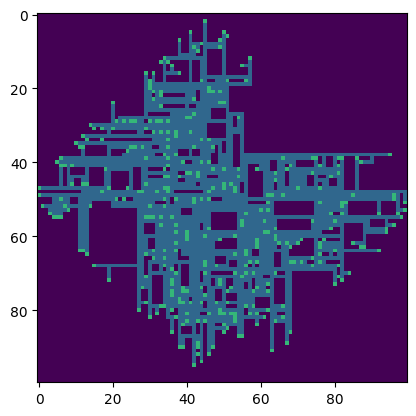

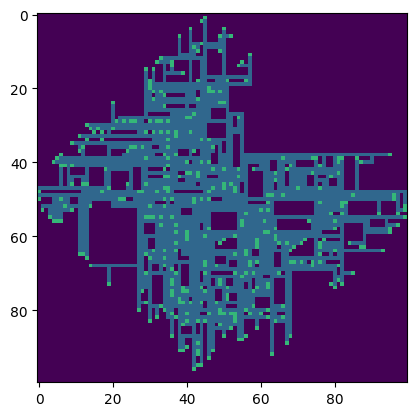

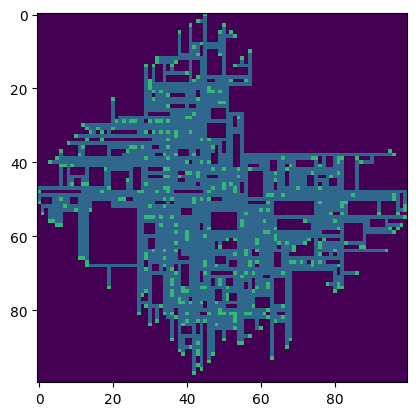

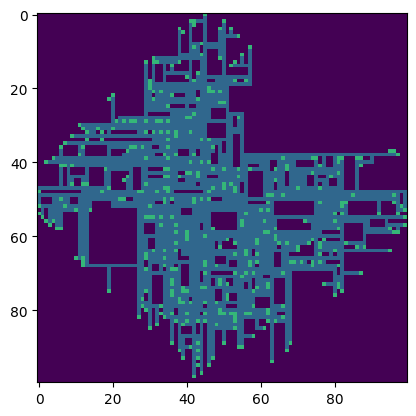

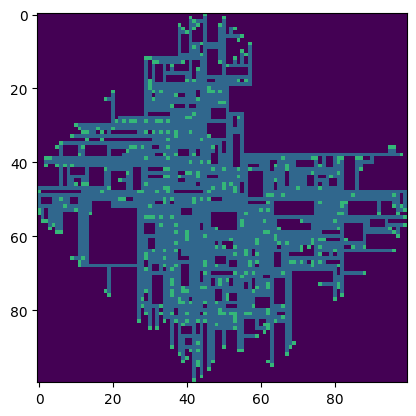

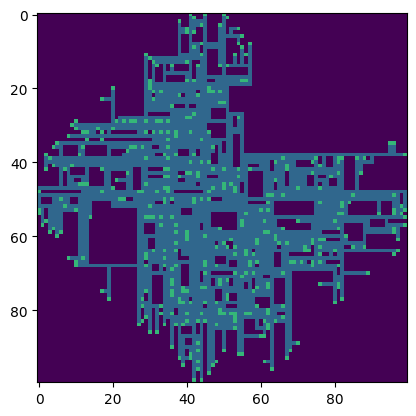

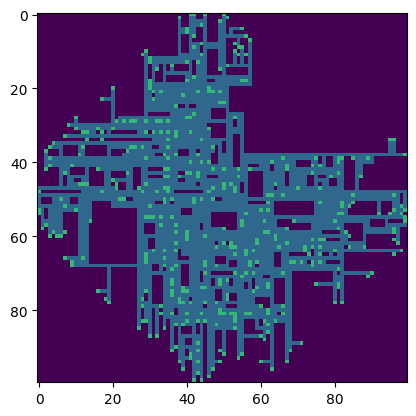

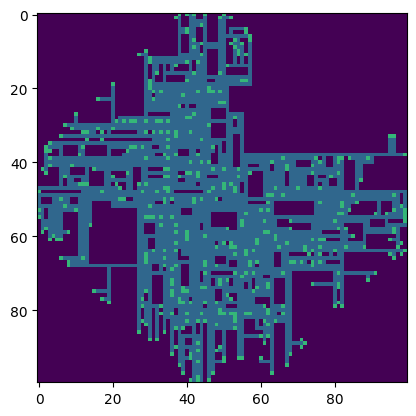

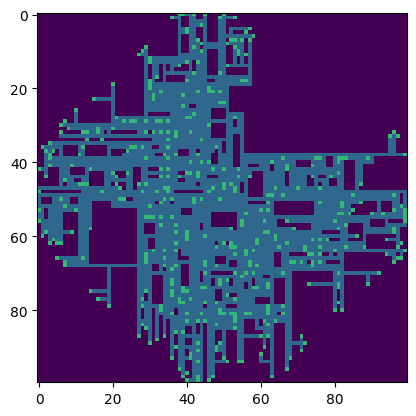

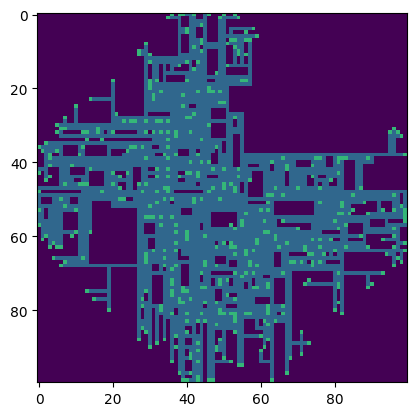

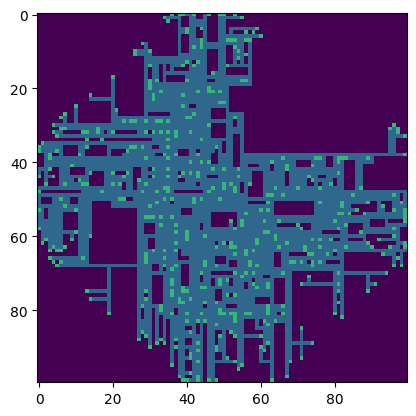

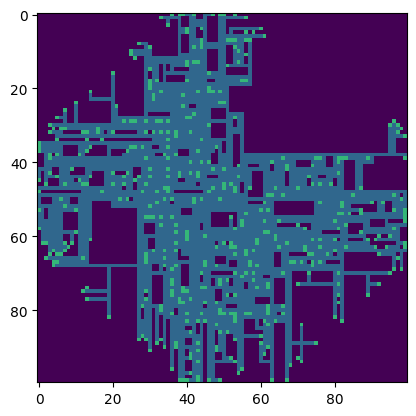

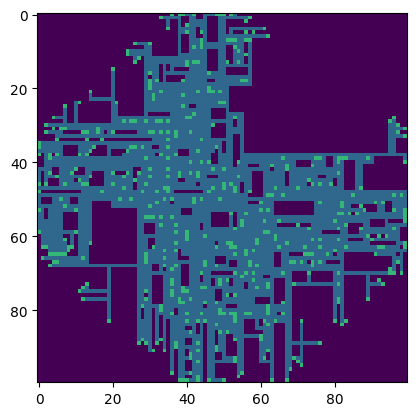

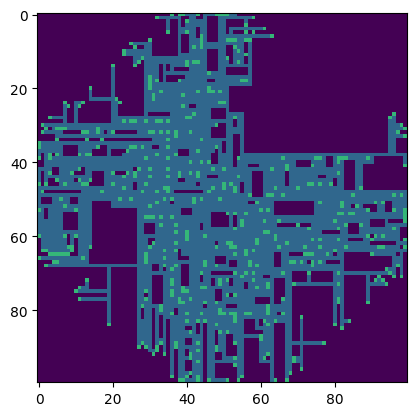

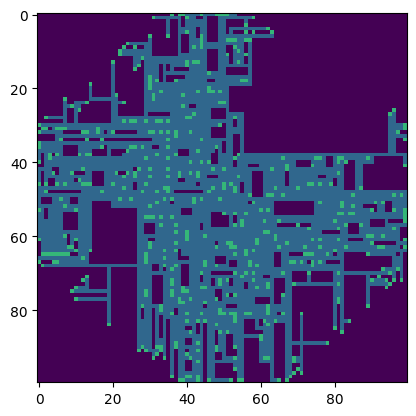

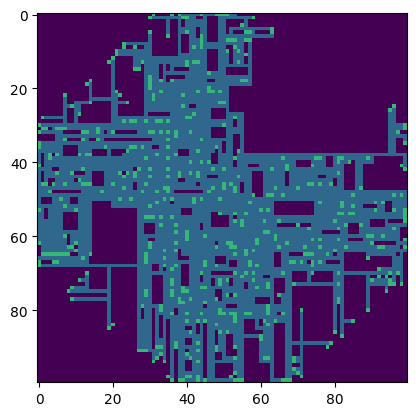

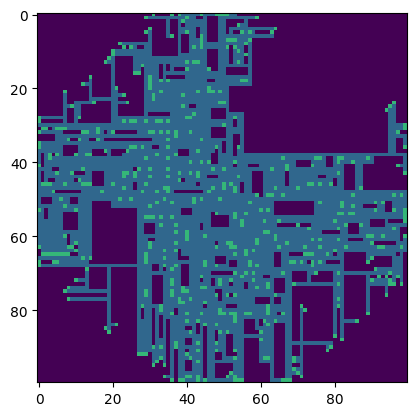

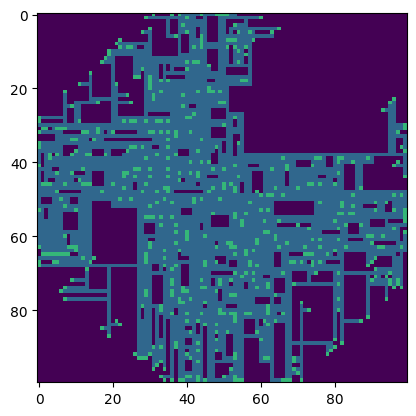

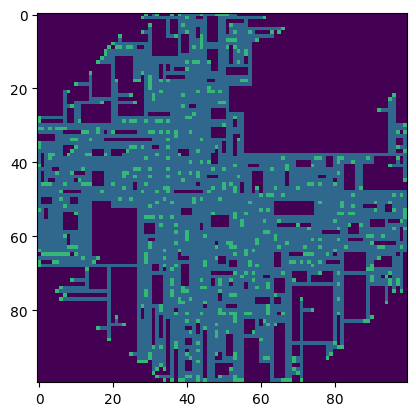

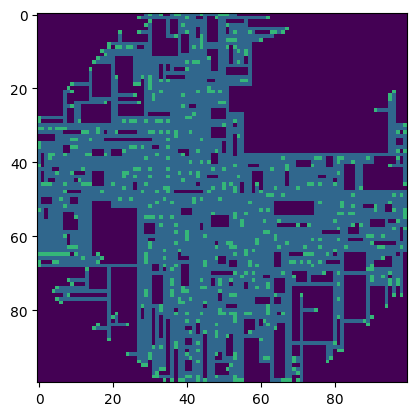

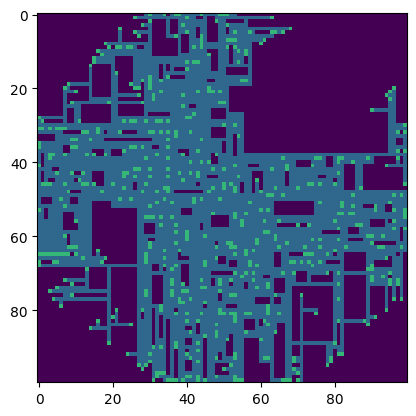

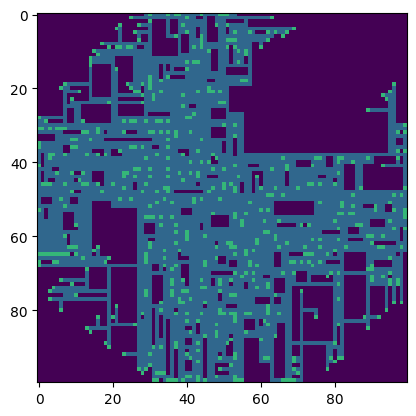

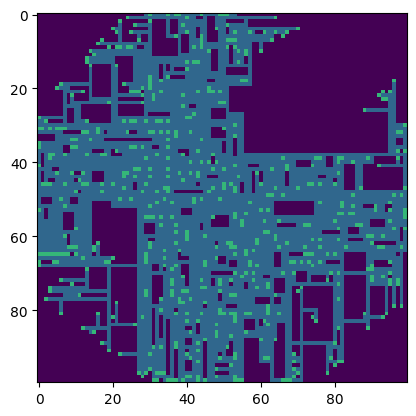

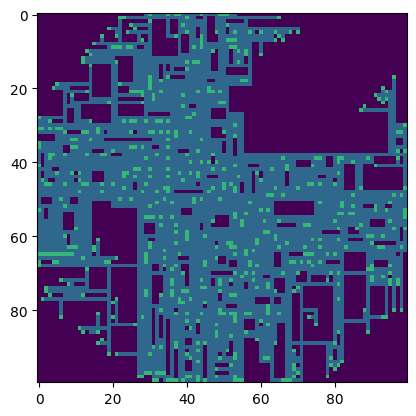

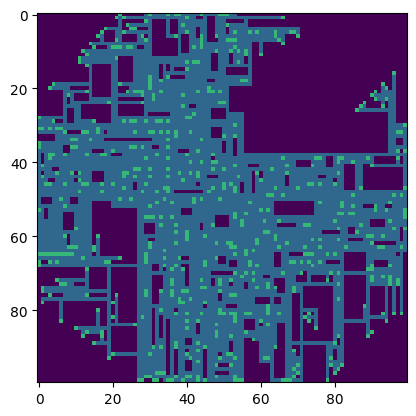

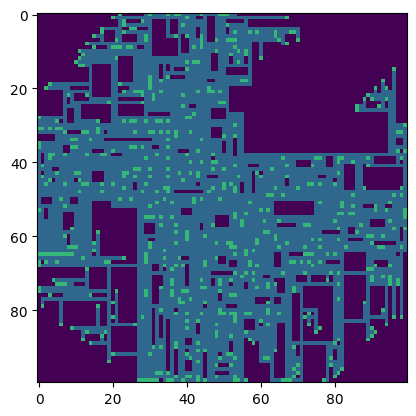

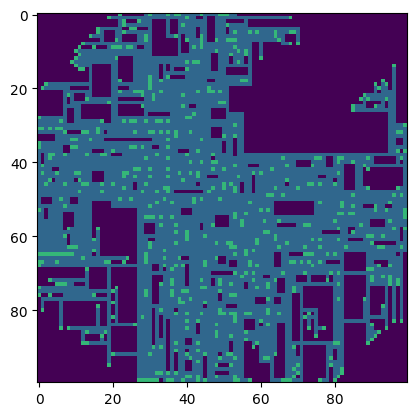

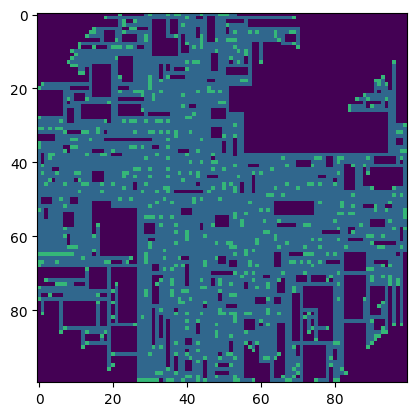

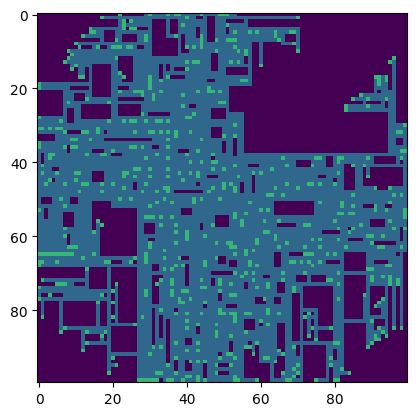

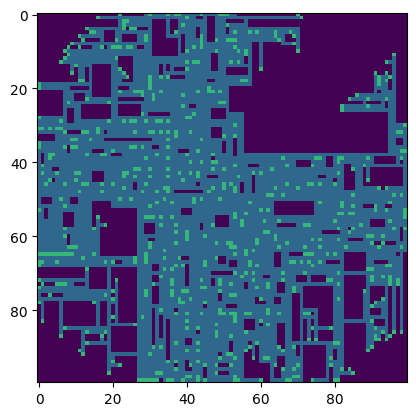

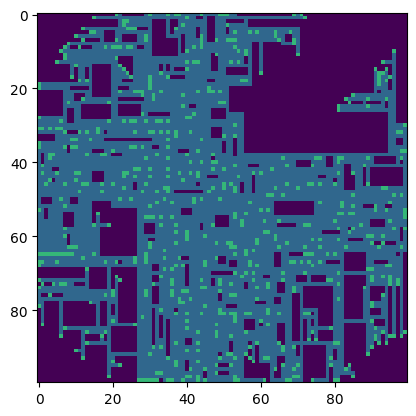

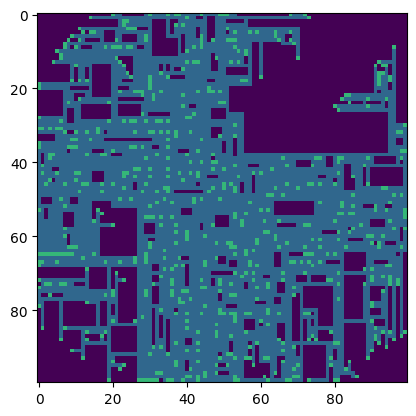

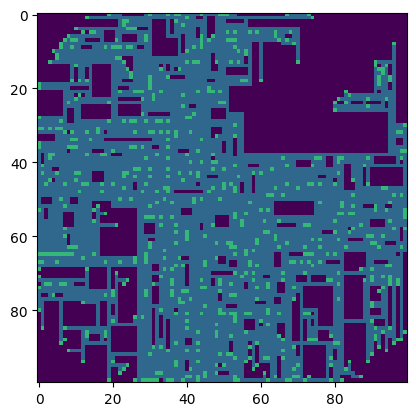

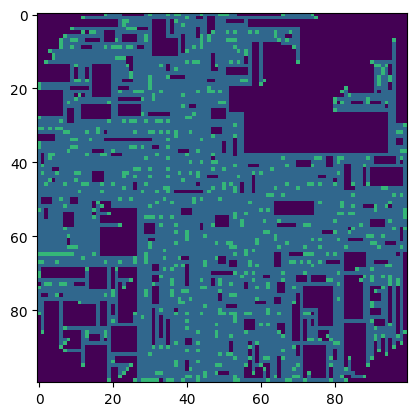

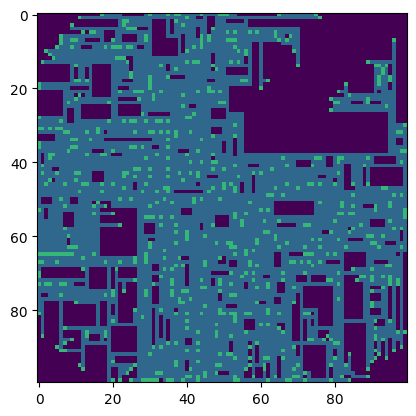

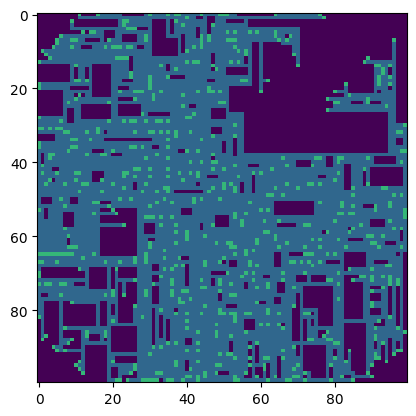

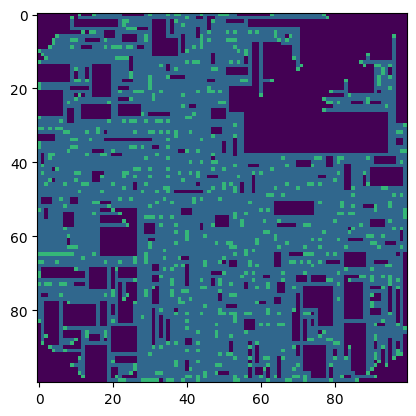

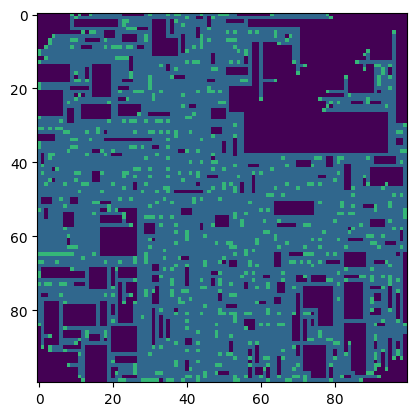

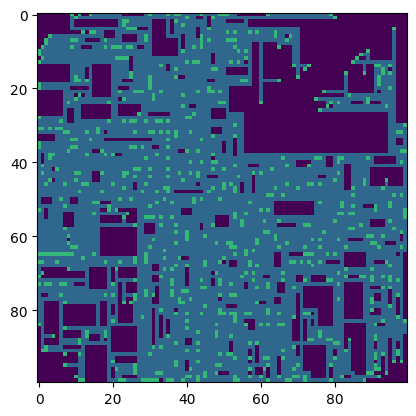

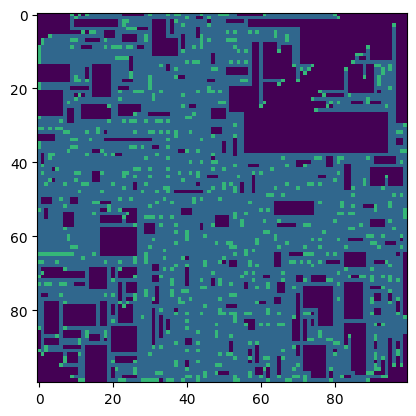

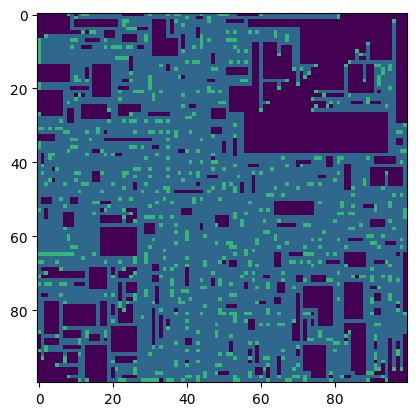

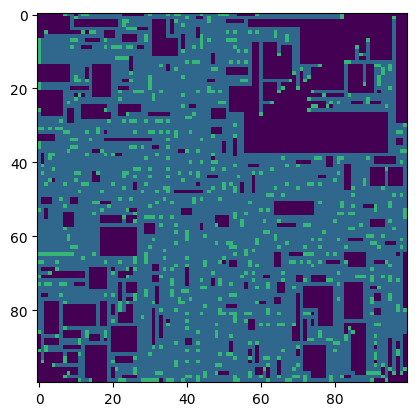

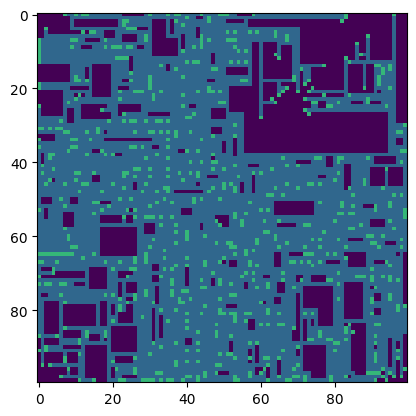

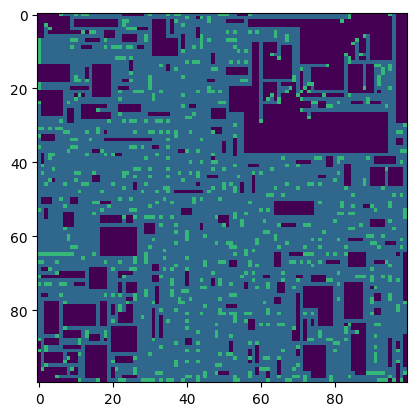

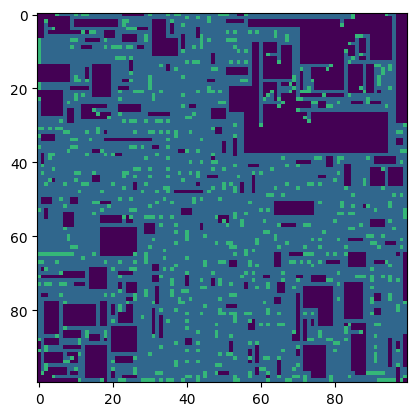

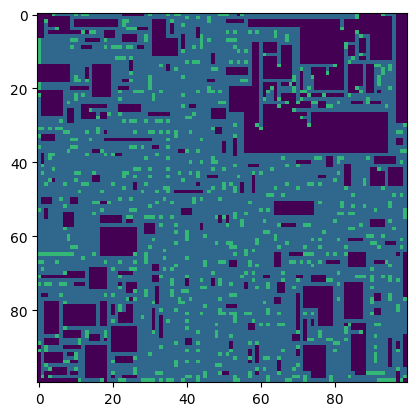

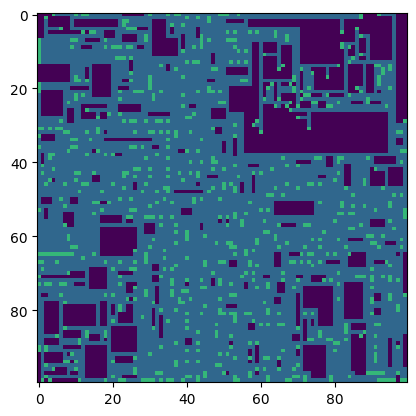

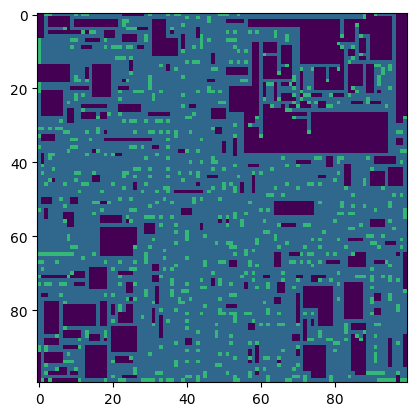

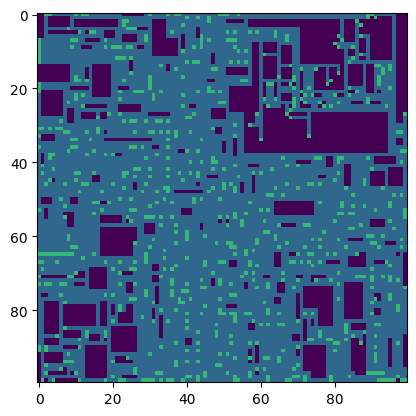

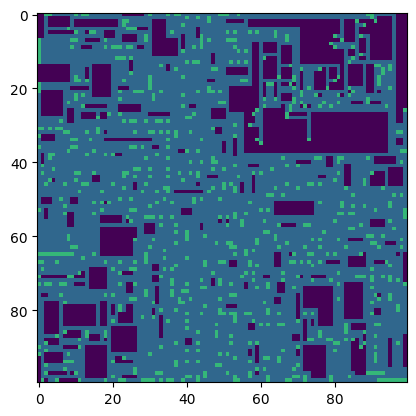

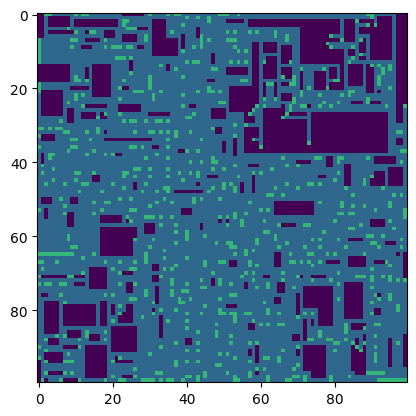

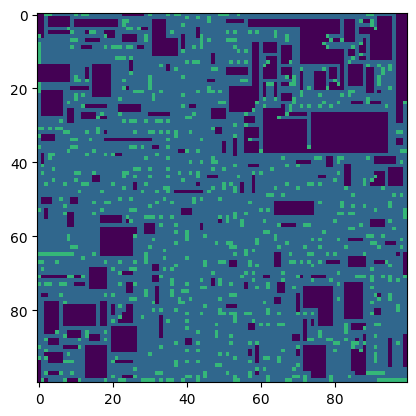

KeyboardInterrupt: 

In [27]:
dir_to_vector = {
    0: np.array([0, 1]),    # up
    1: np.array([1, 0]),    # right
    2: np.array([0, -1]),   # down
    3: np.array([-1, 0])    # left
}

lr = {
    "UP": 0,
    "RIGHT": 1,
    "DOWN": 2,
    "LEFT": 3
}

class Fungus:
    def __init__(self):
        self.fungus = 0
        self.connections = set()

    def update(self, grid, x, y):
        pass


class Hyphae():
    def __init__(self, direction):
        self.direction = direction

    def to_global(self, direction):
        return (self.direction + direction) % 4

    def update(self, grid, x, y):
        movements = [
            (np.random.rand() < 0.9, lr["UP"]),   # relative forward
            (np.random.rand() < 0.1, lr["LEFT"]),       # relative left
            (np.random.rand() < 0.1, lr["RIGHT"])       # relative right
        ]

        has_moved = False
        for m in movements:
            if m[0]:
                m_direction = self.to_global(m[1])
                pos = np.array([x, y]) + dir_to_vector[m_direction]
                if(pos[0] < 0 or pos[0] >= grid.shape[0] or pos[1] < 0 or pos[1] >= grid.shape[1]):
                    # print(".", end="")
                    pass
                elif grid[pos[0], pos[1]].content is None:
                    grid[pos[0], pos[1]].content = Hyphae(m_direction)
                    has_moved = True
        if has_moved:
            grid[x, y].content = Fungus()



class Cell:
    def __init__(self):
        self.substrate = 0
        self.content = None



class Grid:
    def __init__(self, size=100):
        self.grid = np.array([[Cell() for _ in range(size)] for _ in range(size)])
        self.grid[size//2, size//2].content = Hyphae(0)
        self.images = []

    def to_image(self):
        image = np.zeros(self.grid.shape)
        for i in range(self.grid.shape[0]):
            for j in range(self.grid.shape[1]):
                c = self.grid[i, j].content
                image[i, j] = 0 if c is None else 2 if isinstance(c, Hyphae) else 1
        return image

    def run(self, steps=20):
        self.images.append(self.to_image())
        for s in range(steps):
            new_grid = copy.deepcopy(self.grid)
            for i in range(self.grid.shape[0]):
                for j in range(self.grid.shape[1]):

                    # tmp = False
                    # fig, ax = None, None
                    # if(isinstance(self.grid[i, j].content, Hyphae)):
                    #     tmp = True
                    #     fig, ax = plt.subplots(1, 2)
                    # if tmp:
                    #     im = self.to_image()
                    #     im[i, j] = 3
                    #     ax[0].imshow(im, vmin=0, vmax=3)

                    if self.grid[i, j].content is not None:
                        self.grid[i, j].content.update(new_grid, i, j)

                    # if tmp:
                    #     im = self.to_image()
                    #     # im[i, j] = 3
                    #     ax[1].imshow(im, vmin=0, vmax=3)
                    #     plt.show()
                    #     print("---------------------------------")
            self.grid = new_grid
            self.images.append(self.to_image())
            # plt.imshow(self.to_image(), vmin=0, vmax=3)
            # plt.show()

    def animate(self):
        fig, ax = plt.subplots()
        ims = []
        for image in self.images:
            im = ax.imshow(image, animated=True)
            ims.append([im])
        ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000, repeat=True)
        ani.save('fungus_growth.gif', writer='imagemagick')
        


    


grid = Grid(100)
grid.run(200)
grid.animate()